In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import *

In [4]:
df = pd.read_csv(r"C:\Users\laure\mon_projet_diane_consulting\donnees_sources\StockEtablissementLiensSuccession_utf8.csv", sep = ",")

In [3]:
df.head(10)

,siretEtablissementPredecesseur,siretEtablissementSuccesseur,dateLienSuccession,transfertSiege,continuiteEconomique,dateDernierTraitementLienSuccession
0,555002500018,44098064700018,2002-02-01,False,True,2005-11-26T11:54:04
1,555002500026,48346015000012,2005-08-01,False,True,2005-11-26T11:54:04
2,555008200035,605009000056,2004-04-01,False,True,2005-11-26T11:54:04
3,555008200027,605009000049,2004-04-01,False,False,2005-11-26T11:54:04
4,555008200027,605009000031,2004-04-01,False,False,2005-11-26T11:54:04
5,555010800012,41174343800011,1997-04-01,False,True,2005-11-26T11:54:04
6,562015800013,51485712700021,2010-04-01,False,True,2010-03-19T11:06:55
7,562019000040,562019000065,2016-01-01,False,True,2016-03-14T09:50:04
8,562019000032,562019000040,2010-02-22,False,True,2010-03-23T10:17:27
9,562019000024,562019000032,1998-03-23,False,True,2005-11-26T11:54:04


In [4]:
df.describe(include="all")

,siretEtablissementPredecesseur,siretEtablissementSuccesseur,dateLienSuccession,transfertSiege,continuiteEconomique,dateDernierTraitementLienSuccession
count,7.207852e+06,7.207852e+06,7207852,7207852,7207852,7207852
unique,NaN,NaN,16489,2,2,4281790
top,NaN,NaN,2005-01-01,False,True,2005-11-26T12:14:43
freq,NaN,NaN,29558,6109062,5477360,3719
mean,4.781534e+13,4.939934e+13,NaN,NaN,NaN,NaN
std,1.537384e+13,1.582366e+13,NaN,NaN,NaN,NaN
min,3.251750e+10,3.251750e+10,NaN,NaN,NaN,NaN
25%,3.833391e+13,3.919959e+13,NaN,NaN,NaN,NaN
50%,4.331200e+13,4.431689e+13,NaN,NaN,NaN,NaN
75%,5.113844e+13,5.201194e+13,NaN,NaN,NaN,NaN


In [11]:
df.continuiteEconomique.unique()

array([ True, False])

In [17]:
print(df.isnull().sum())

siretEtablissementPredecesseur         0
siretEtablissementSuccesseur           0
dateLienSuccession                     0
transfertSiege                         0
continuiteEconomique                   0
dateDernierTraitementLienSuccession    0
dtype: int64


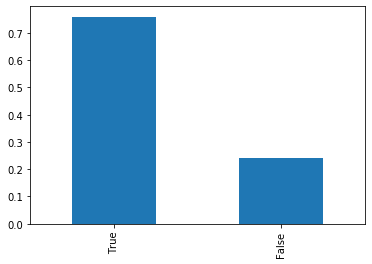

In [19]:
df["continuiteEconomique"].value_counts(normalize=True).plot(kind='bar')
plt.show()

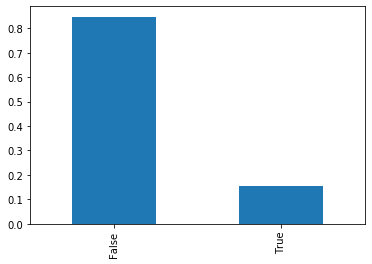

In [20]:
df["transfertSiege"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [27]:
df.pivot_table('siretEtablissementPredecesseur', index='continuiteEconomique', columns='transfertSiege', aggfunc="count")

transfertSiege,False,True
continuiteEconomique,,
False,1730492.0,NaN
True,4378570.0,1098790.0


In [5]:
effectifs = df["siretEtablissementPredecesseur"].value_counts()

In [6]:
print(effectifs)

31300257800042    118
62201256500025    116
62201452000028    101
34513048800017     76
96750575102053     58
                 ... 
39991805100026      1
33243694800050      1
40036445100015      1
47861768100026      1
41875295200014      1
Name: siretEtablissementPredecesseur, Length: 6896074, dtype: int64


In [17]:
new_champ = df.transfertSiege

In [21]:
df['new_champ']=df.transfertSiege

In [23]:
df['new_champ']=df.continuiteEconomique

In [26]:
df.loc[df.dateLienSuccession >= '2004-01-01']

,siretEtablissementPredecesseur,siretEtablissementSuccesseur,dateLienSuccession,transfertSiege,continuiteEconomique,dateDernierTraitementLienSuccession,new_champ
1,555002500026,48346015000012,2005-08-01,False,True,2005-11-26T11:54:04,True
2,555008200035,605009000056,2004-04-01,False,True,2005-11-26T11:54:04,True
3,555008200027,605009000049,2004-04-01,False,False,2005-11-26T11:54:04,False
4,555008200027,605009000031,2004-04-01,False,False,2005-11-26T11:54:04,False
6,562015800013,51485712700021,2010-04-01,False,True,2010-03-19T11:06:55,True
...,...,...,...,...,...,...,...
7207847,53373450500019,53373450500027,2020-04-16,True,True,2020-05-30T19:31:42,True
7207848,52438056500019,88197168300019,2020-04-24,False,True,2020-05-29T22:44:06,True
7207849,81113296800017,81113296800025,2020-05-27,True,True,2020-05-29T22:53:56,True
7207850,49067903200022,49067903200030,2020-04-28,False,True,2020-05-30T08:31:48,True


In [47]:
df['diff_etablissement'] = df['siretEtablissementPredecesseur'] - df['siretEtablissementSuccesseur']

In [85]:
df['constante'] = 1

In [87]:
df.head(10)

,siretEtablissementPredecesseur,siretEtablissementSuccesseur,dateLienSuccession,transfertSiege,continuiteEconomique,dateDernierTraitementLienSuccession,new_champ,diff_etablissement,constante
0,555002500018,44098064700018,2002-02-01,False,True,2005-11-26T11:54:04,True,-43543062200000,1
1,555002500026,48346015000012,2005-08-01,False,True,2005-11-26T11:54:04,True,-47791012499986,1
2,555008200035,605009000056,2004-04-01,False,True,2005-11-26T11:54:04,True,-50000800021,1
3,555008200027,605009000049,2004-04-01,False,False,2005-11-26T11:54:04,False,-50000800022,1
4,555008200027,605009000031,2004-04-01,False,False,2005-11-26T11:54:04,False,-50000800004,1
5,555010800012,41174343800011,1997-04-01,False,True,2005-11-26T11:54:04,True,-40619332999999,1
6,562015800013,51485712700021,2010-04-01,False,True,2010-03-19T11:06:55,True,-50923696900008,1
7,562019000040,562019000065,2016-01-01,False,True,2016-03-14T09:50:04,True,-25,1
8,562019000032,562019000040,2010-02-22,False,True,2010-03-23T10:17:27,True,-8,1
9,562019000024,562019000032,1998-03-23,False,True,2005-11-26T11:54:04,True,-8,1


In [88]:
if df['siretEtablissementPredecesseur'] == df['siretEtablissementSuccesseur'] : 
    df['siret_egal']=1
else : 
    df['siret_egal']=0    
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df_filtre = df.loc[df.diff_etablissement == 0]